In [3]:
from utils.result import *
%reload_ext autoreload
%autoreload 2
stimuli = ['0-Bea', '0-Bol', '0-Ctl', '0-DatExt', '0-Far', '0-Ger', '0-Iso', '0-Lin', 
           '0-M2', '0-M3', '0-M4', '0-M5', '0-M6', '0-Mal', '0-Myr', '0-Ner', 
           '1-P3', '1-P4', '1-P5', '1-P9', '1-P9_Hund', '1-P9_Ten', '1-P9_TenThous']

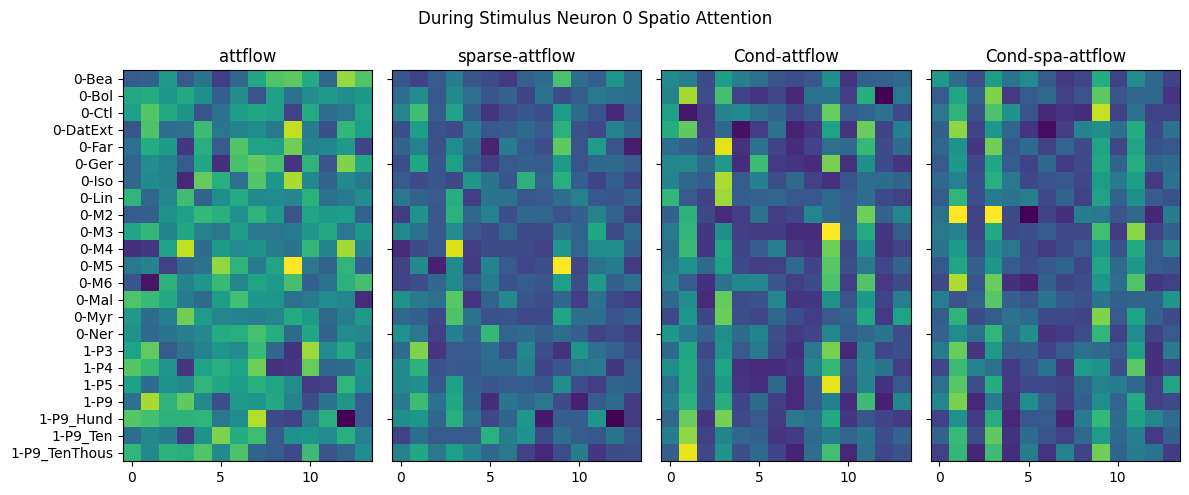

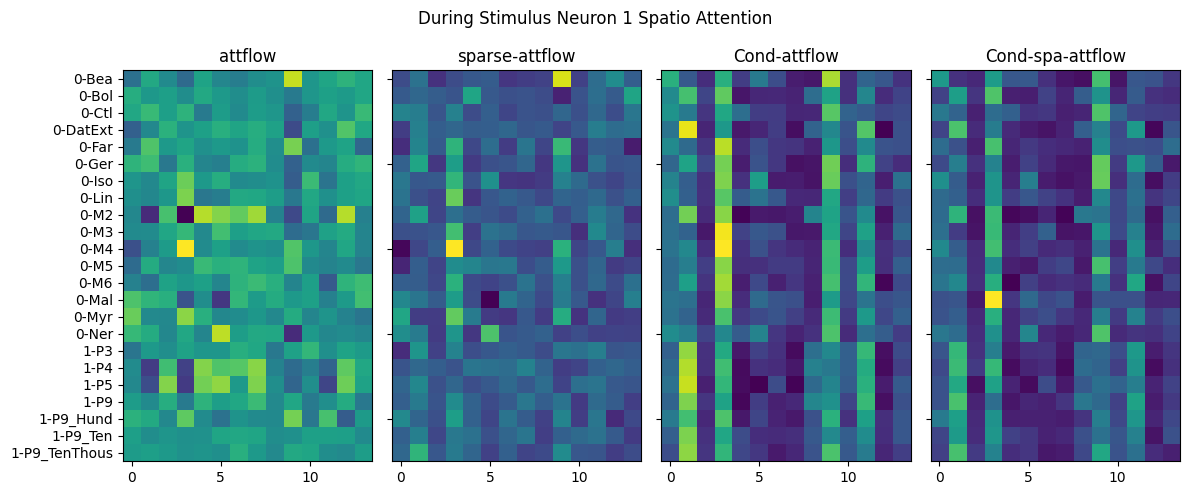

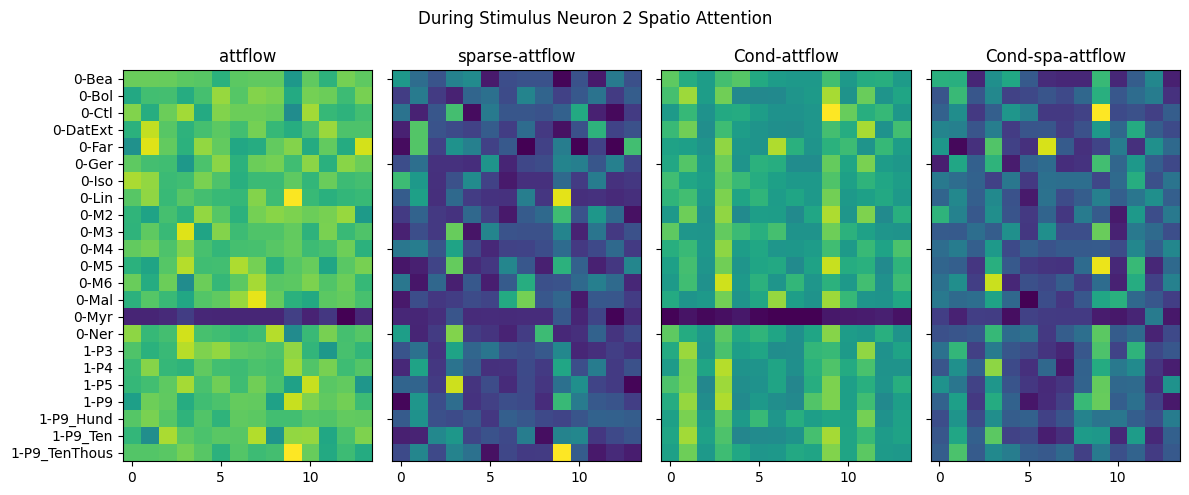

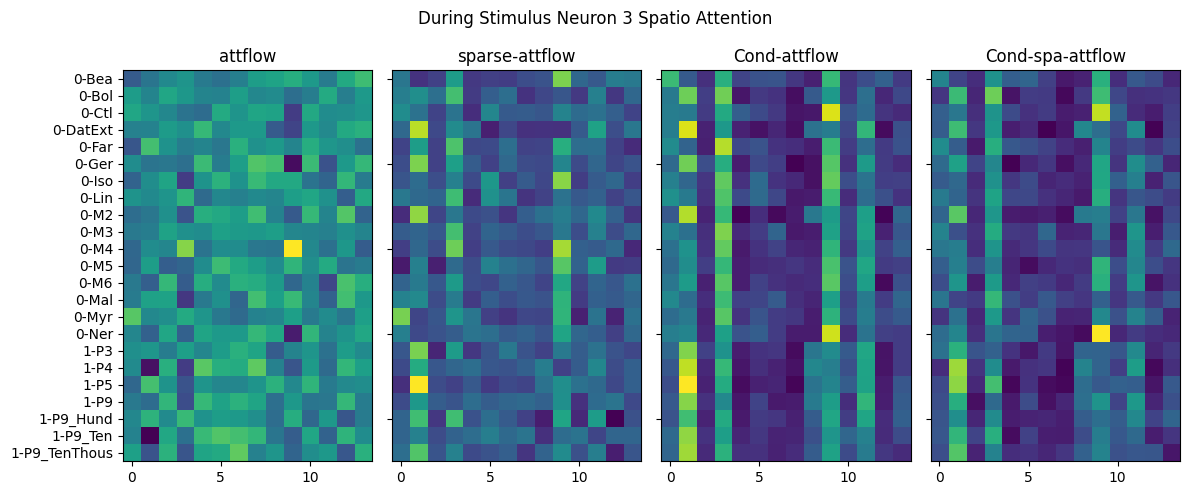

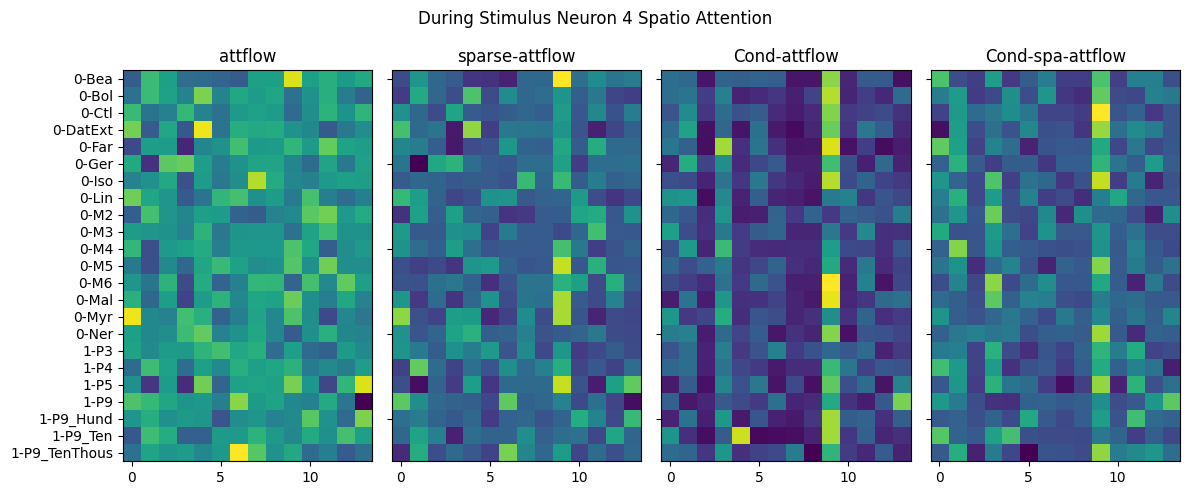

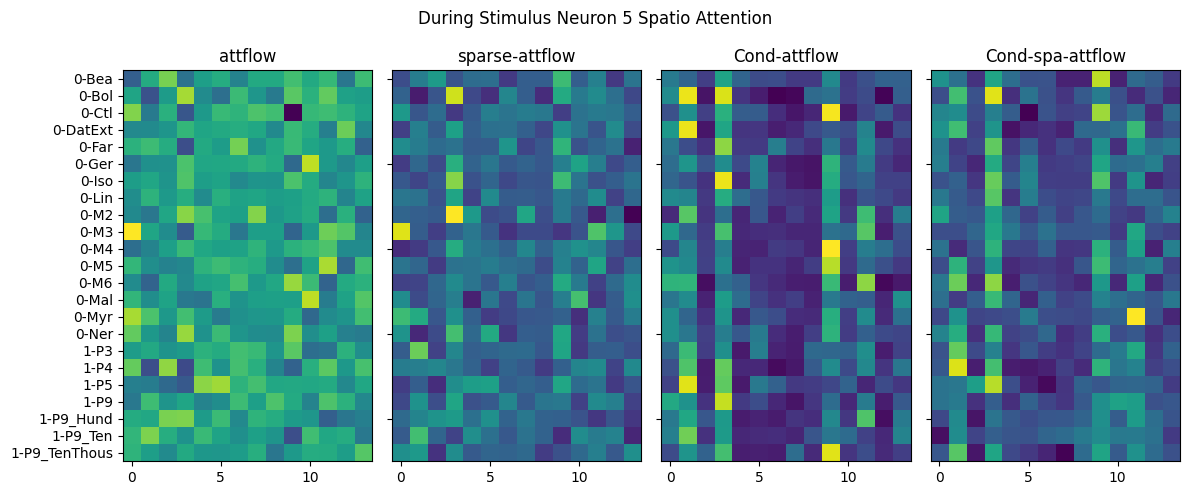

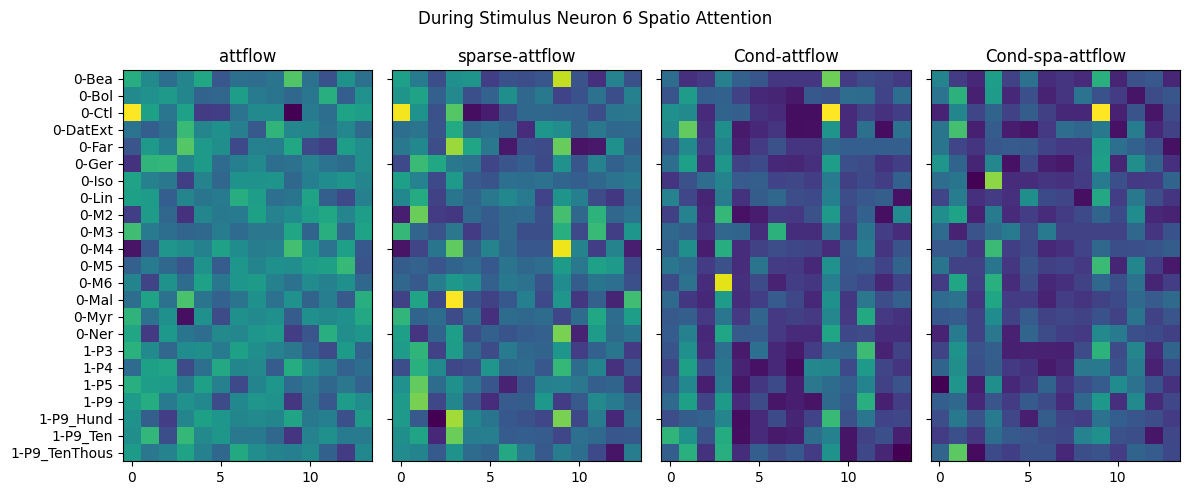

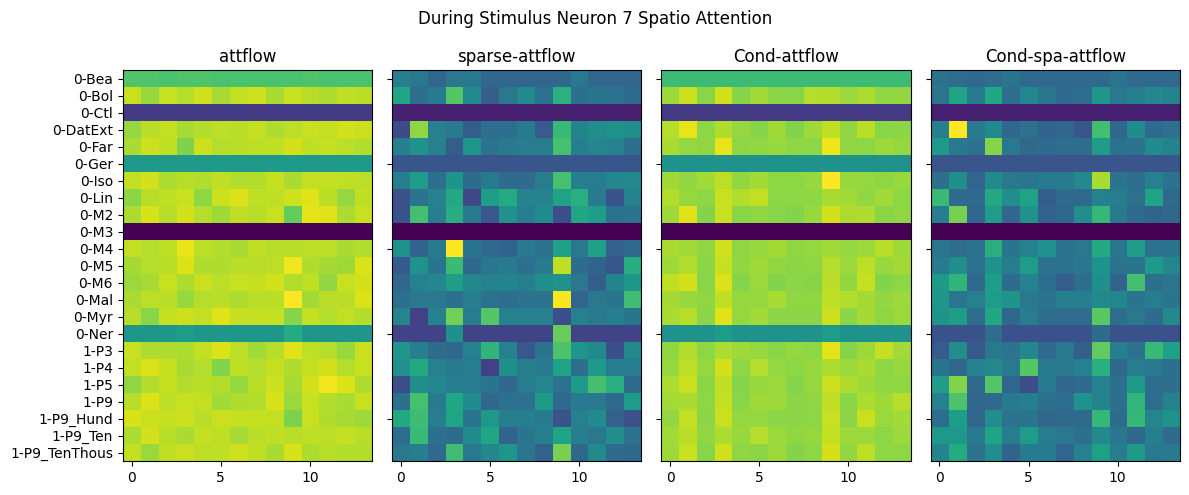

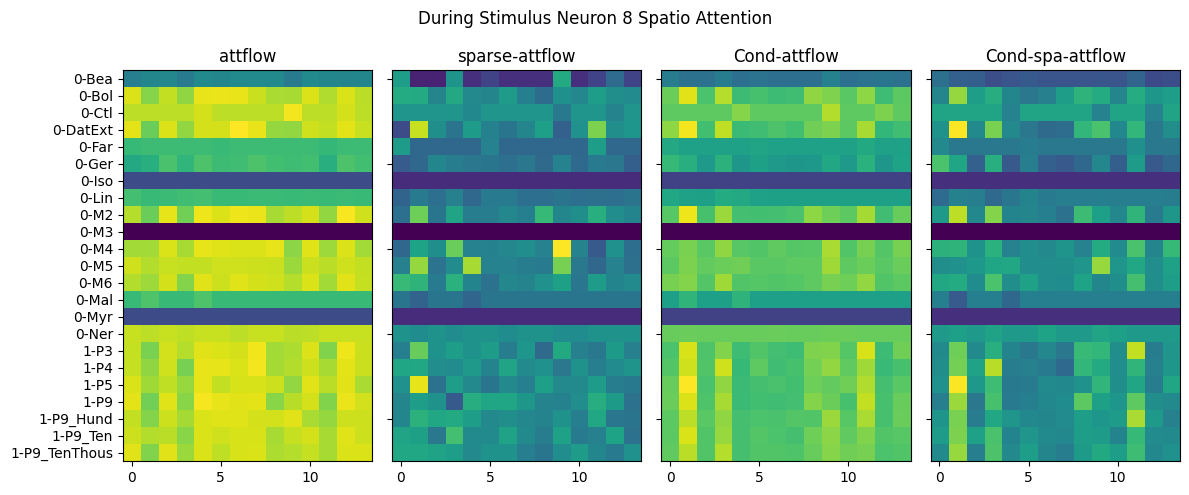

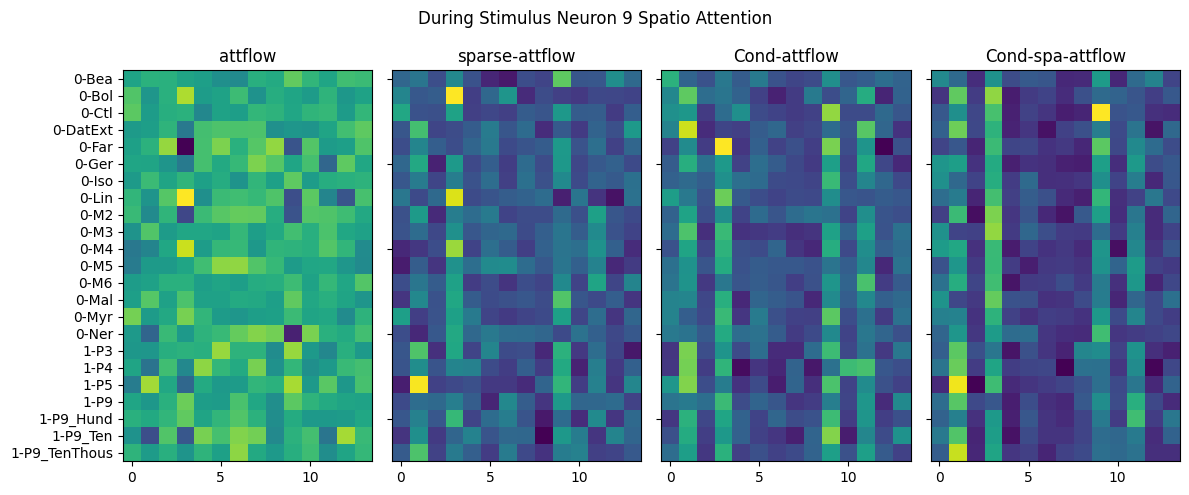

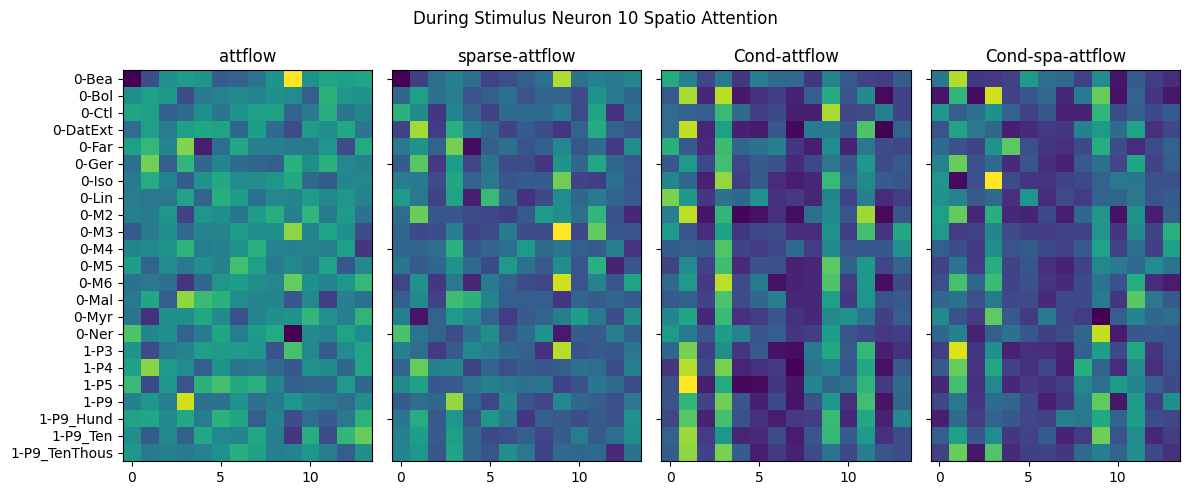

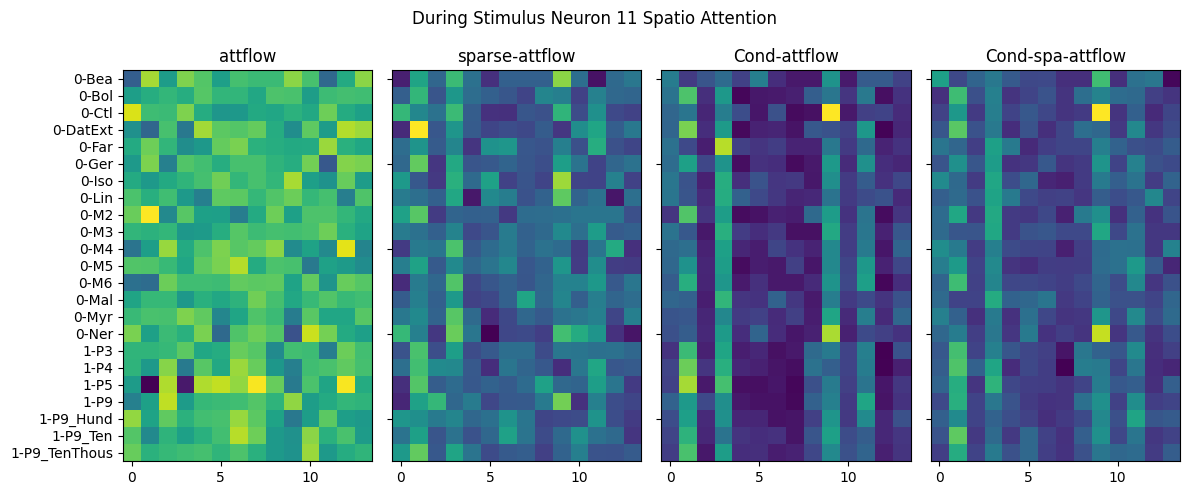

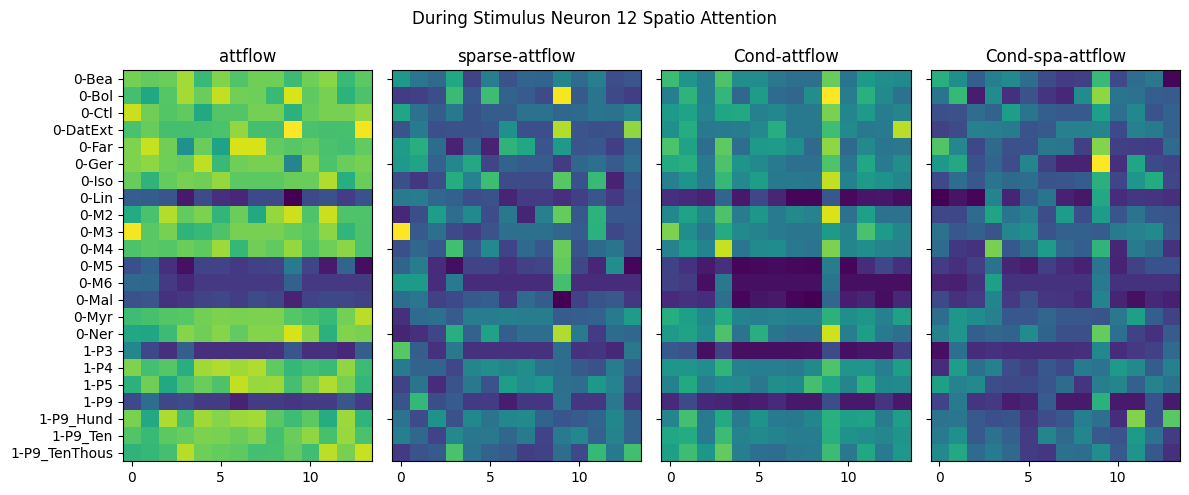

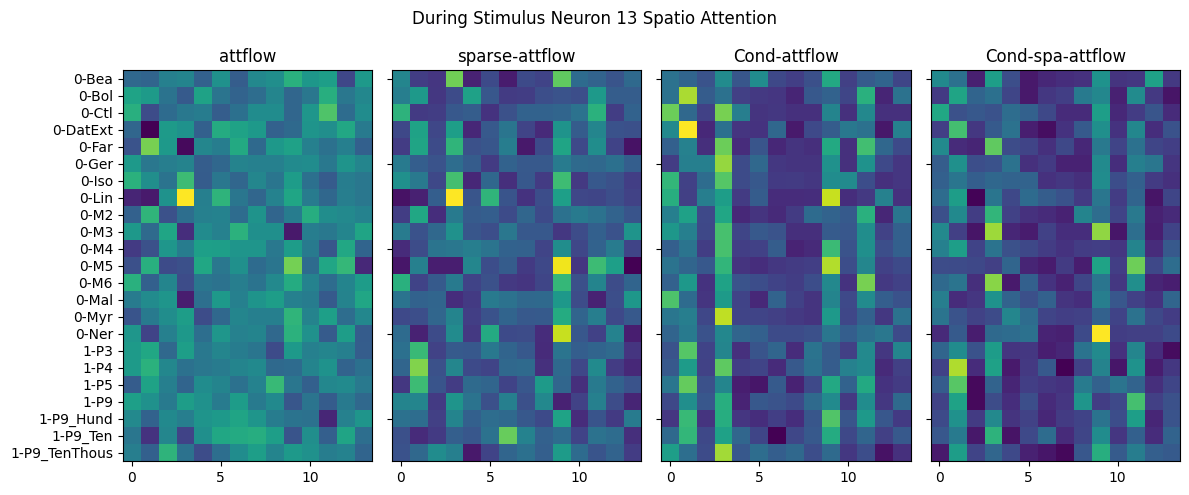

In [4]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,14):
    att_betai, _, att_ensemble, _ = analyze_betai(yaml_filepath="config/attflow/attflow-{}.yaml".format(target), 
                                                                   cond=False)
    spa_att_betai, _, spa_att_ensemble, _ = analyze_betai(yaml_filepath="config/sparse-attflow/sparse-attflow-{}.yaml".format(target), 
                                                                   cond=False)
    attcond_betai, _, attcond_ensemble, _ = analyze_betai(yaml_filepath="config/attflow/attflow-{}.yaml".format(target),
                                                                               cond=True)
    spa_attcond_betai, _, spa_attcond_ensemble, _ = analyze_betai(yaml_filepath="config/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    
    dur_attcond_stim_ensemble_average.append(attcond_ensemble)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    plot_ensemble([att_ensemble, spa_att_ensemble,attcond_ensemble, spa_attcond_ensemble], 
                  ["attflow","sparse-attflow", "Cond-attflow","Cond-spa-attflow"], 
                  target,
                  q_labels=stimuli,
                  section="During")

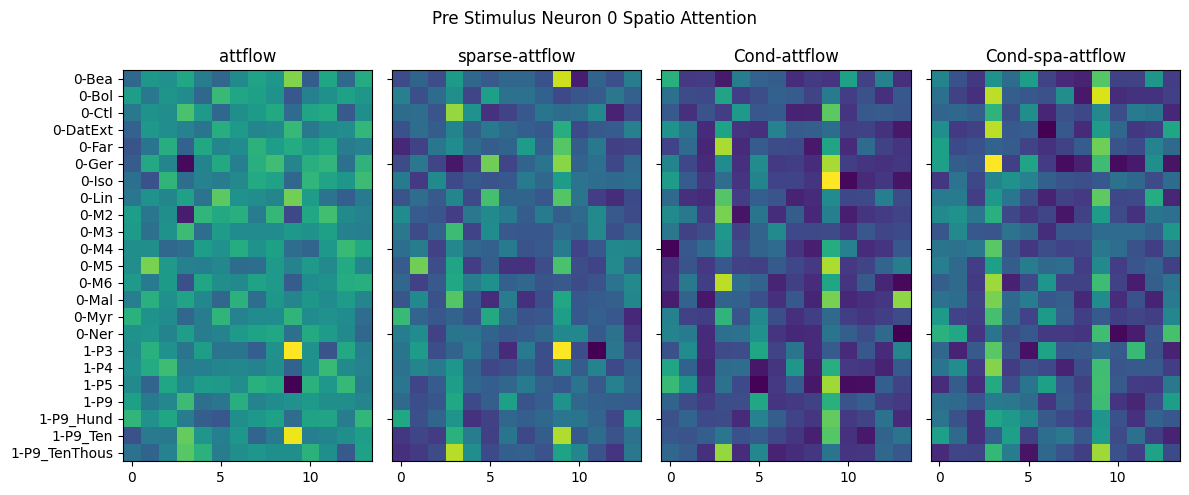

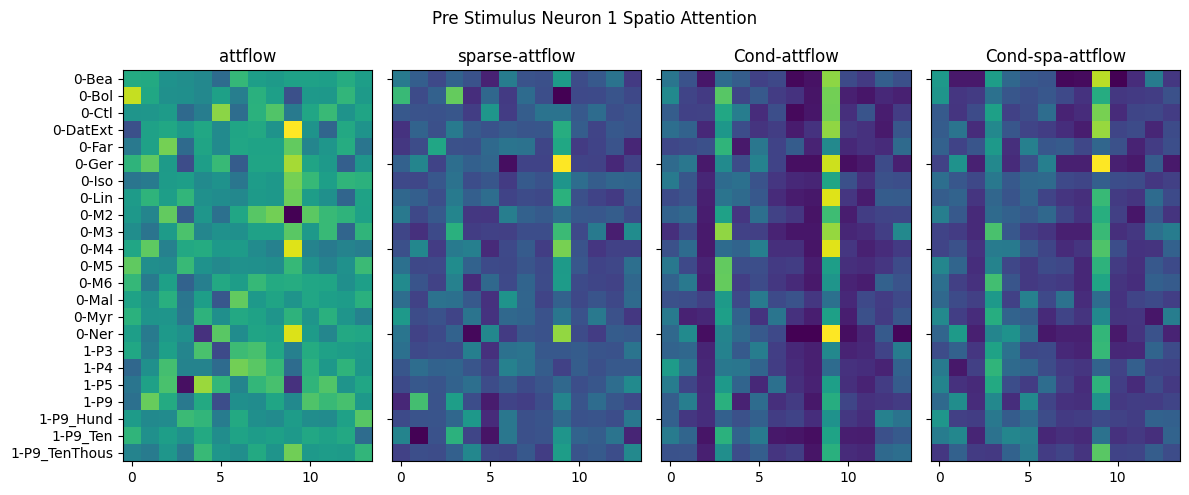

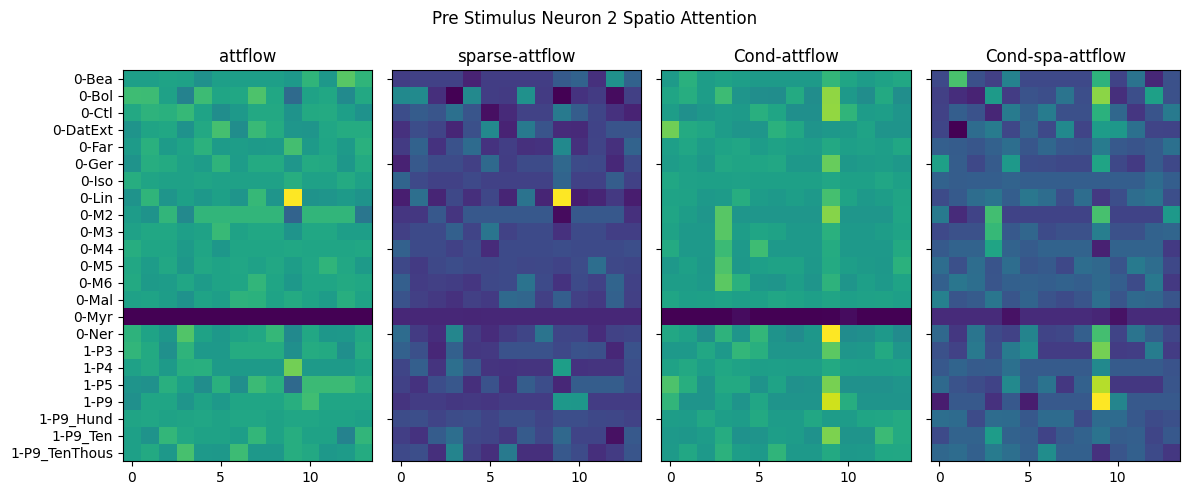

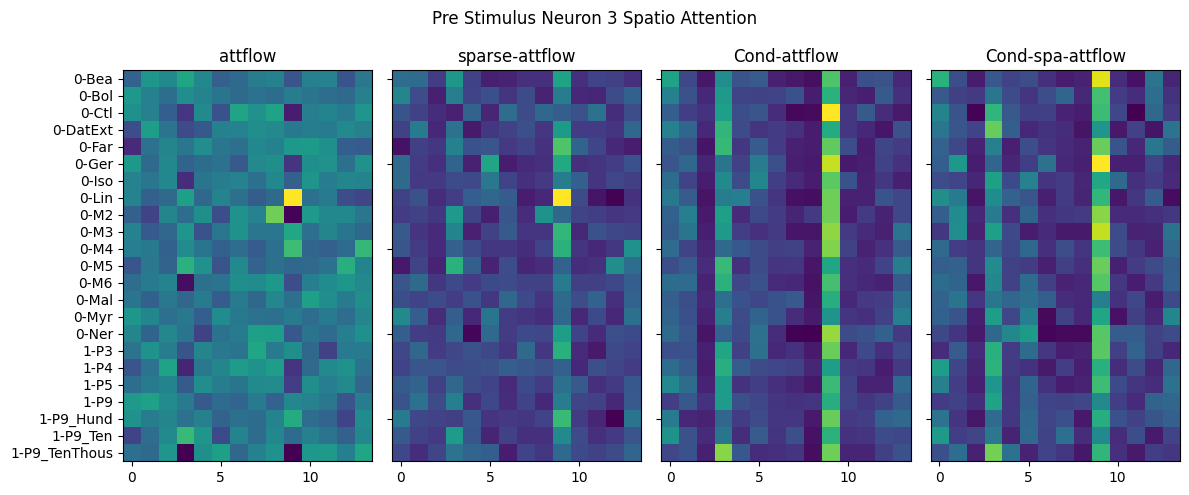

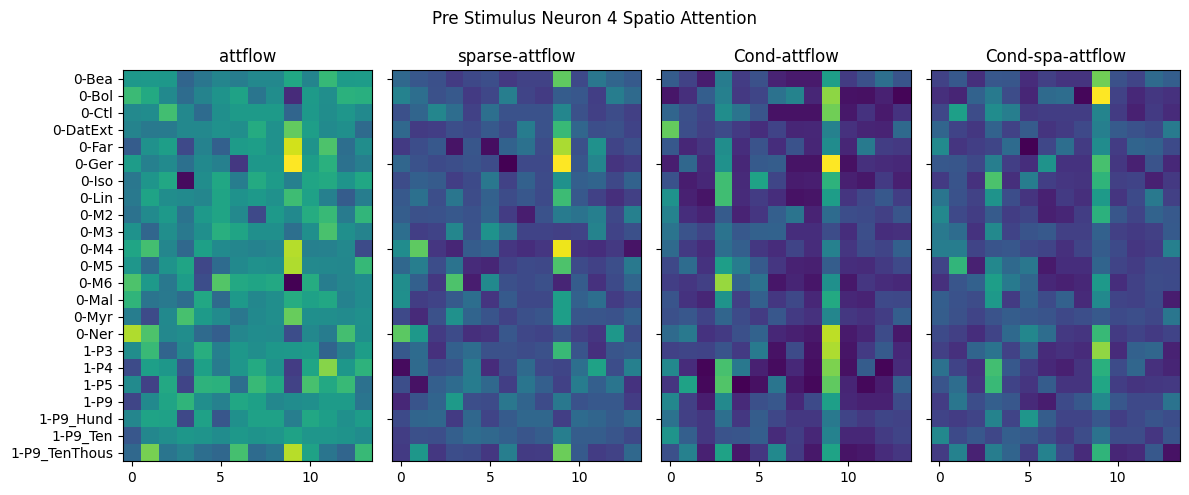

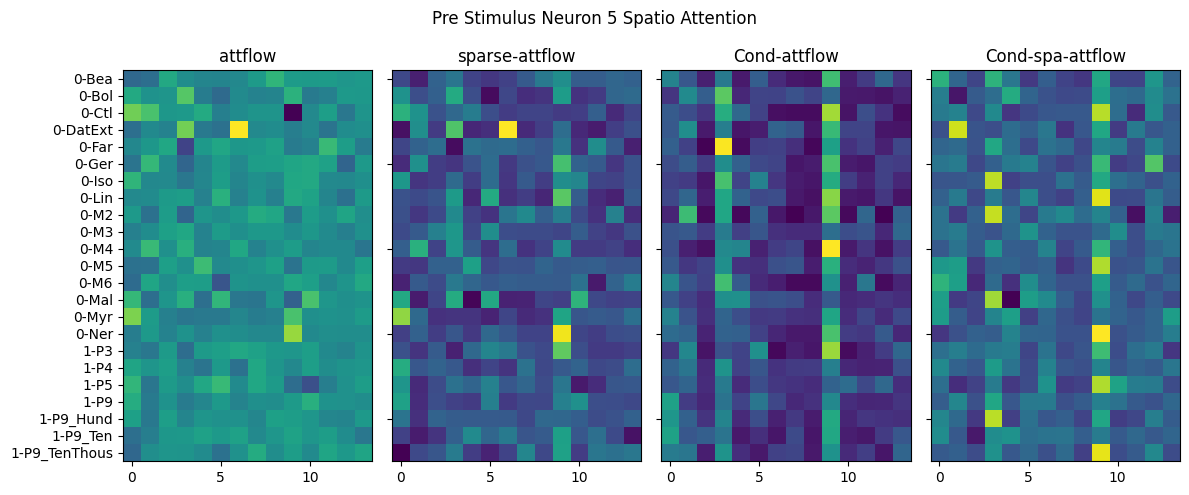

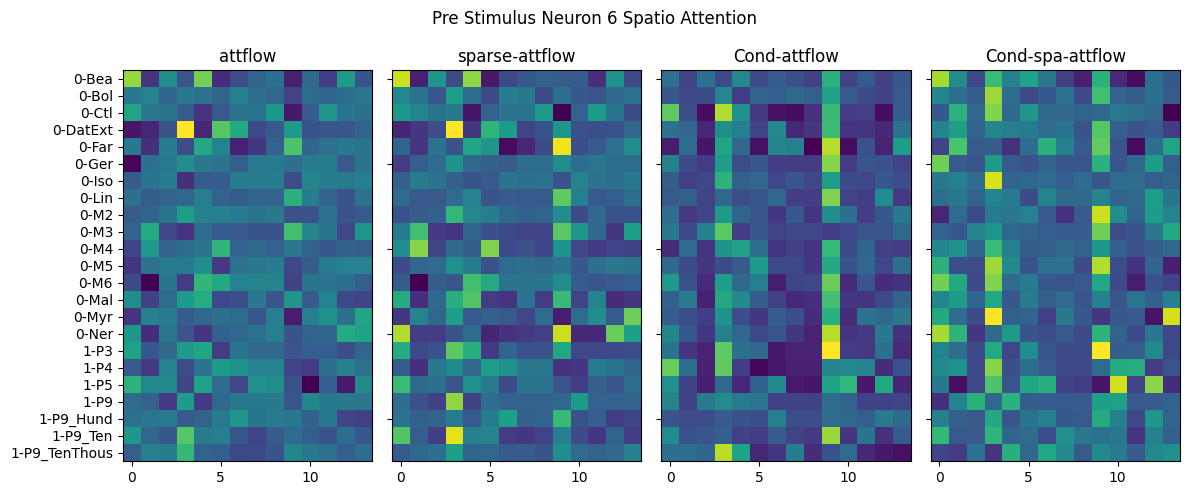

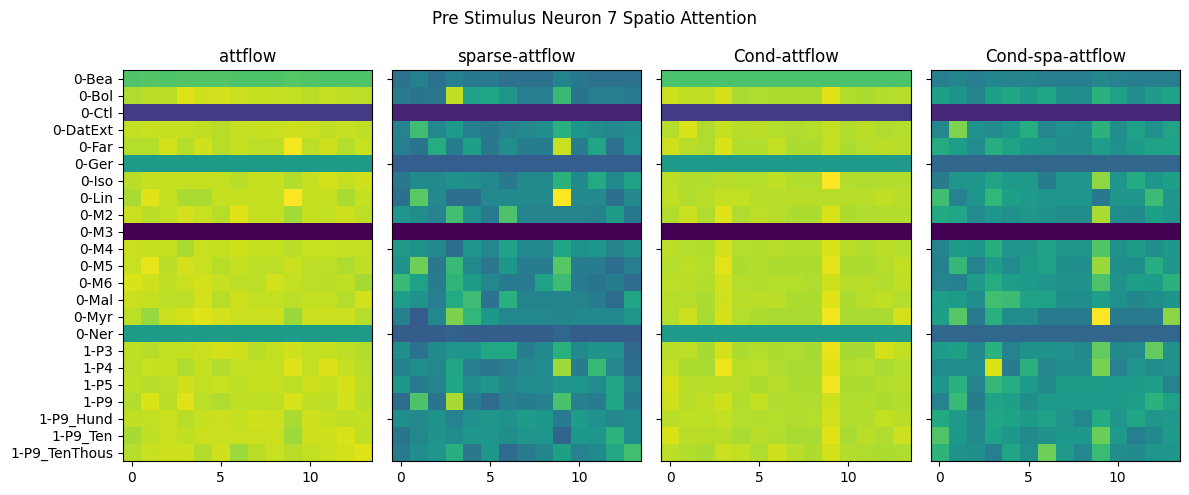

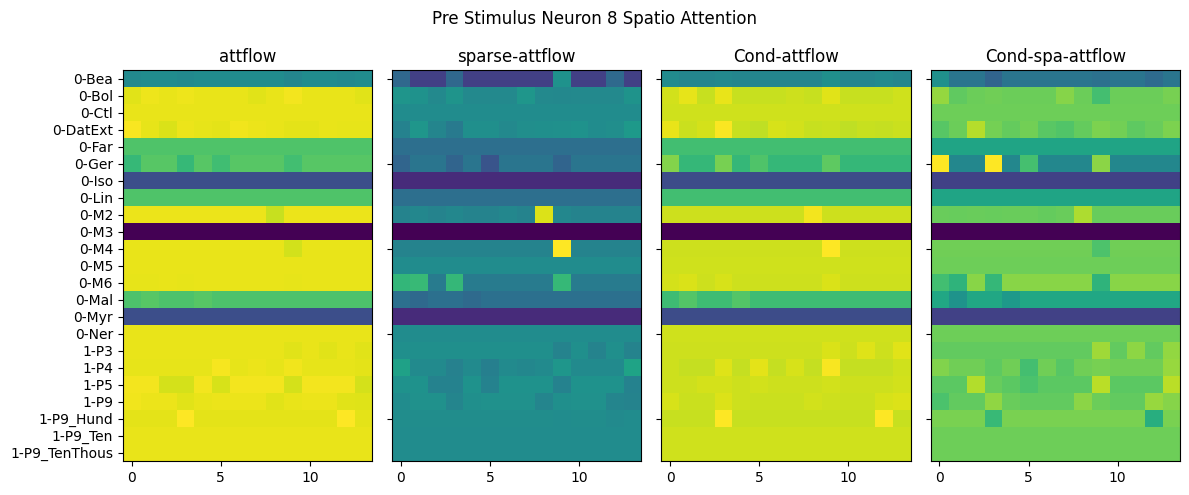

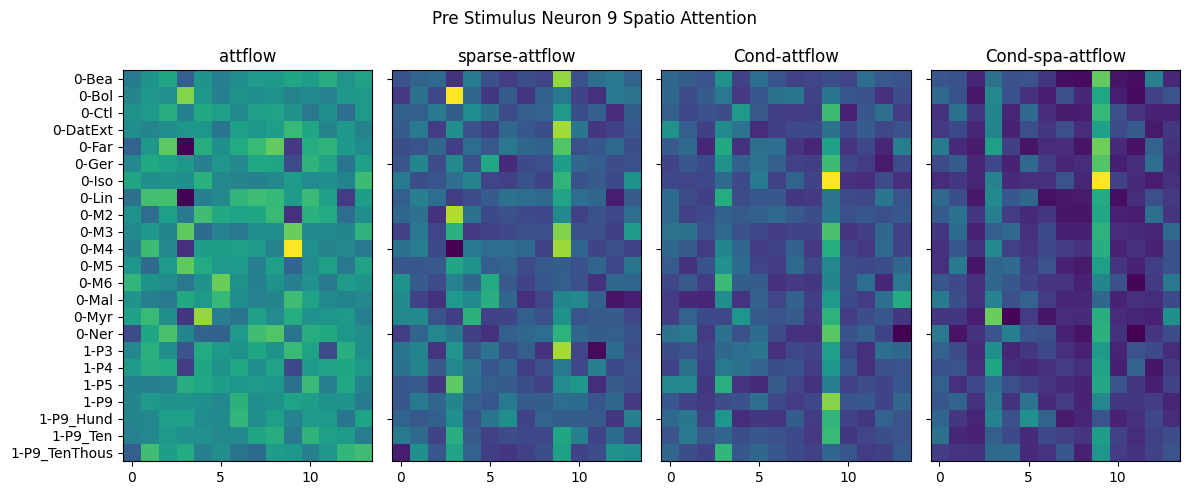

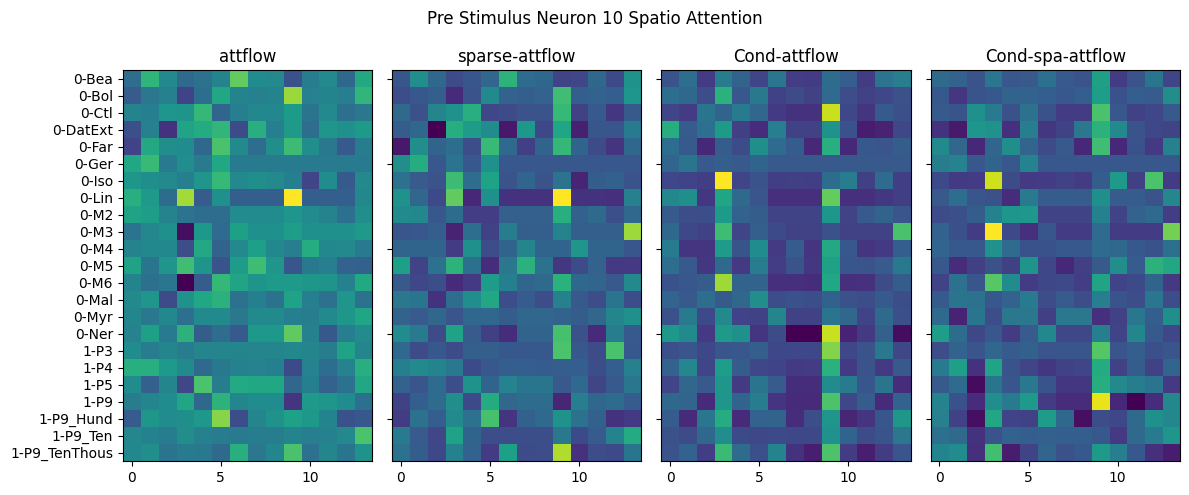

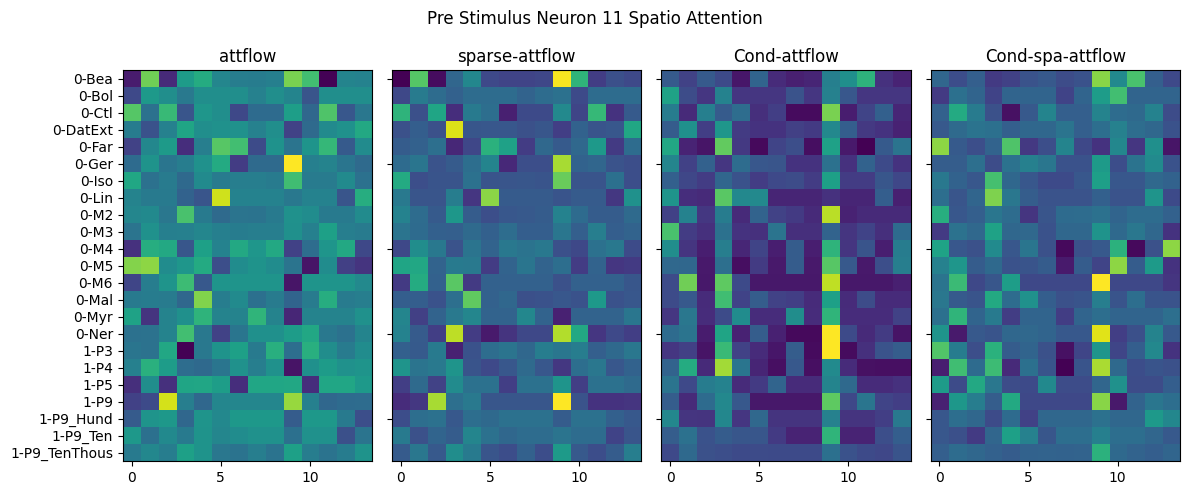

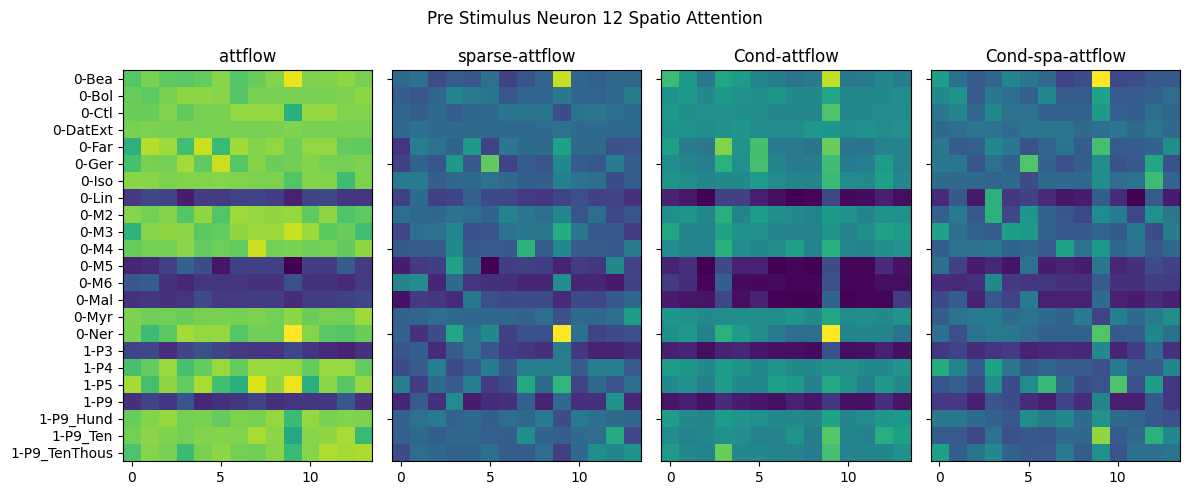

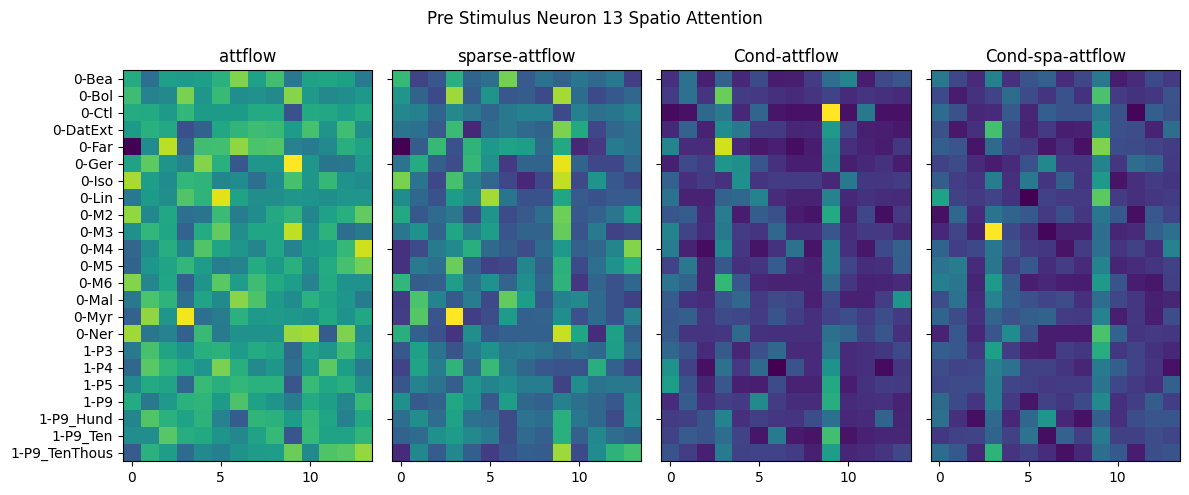

In [5]:
pre_attcond_stim_ensemble_average = []
pre_spa_attcond_stim_ensemble_average = []
for target in range(0,14):
    att_betai, att_ensemble, _,_ = analyze_betai(yaml_filepath="config/attflow/attflow-{}.yaml".format(target), 
                                                                   cond=False)
    spa_att_betai, spa_att_ensemble,_,  _ = analyze_betai(yaml_filepath="config/sparse-attflow/sparse-attflow-{}.yaml".format(target), 
                                                                   cond=False)
    attcond_betai, attcond_ensemble, _, _ = analyze_betai(yaml_filepath="config/attflow/attflow-{}.yaml".format(target),
                                                                               cond=True)
    spa_attcond_betai, spa_attcond_ensemble, _, _ = analyze_betai(yaml_filepath="config/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    
    pre_attcond_stim_ensemble_average.append(attcond_ensemble)
    pre_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    plot_ensemble([att_ensemble, spa_att_ensemble,attcond_ensemble, spa_attcond_ensemble], 
                  ["attflow","sparse-attflow", "Cond-attflow","Cond-spa-attflow"], 
                  target,
                  q_labels=stimuli,
                  section="Pre")

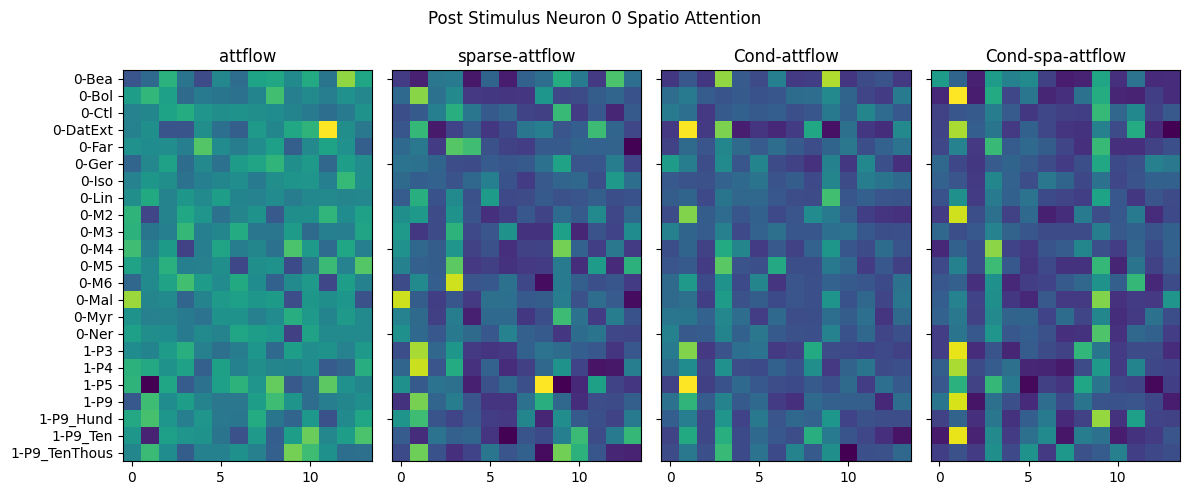

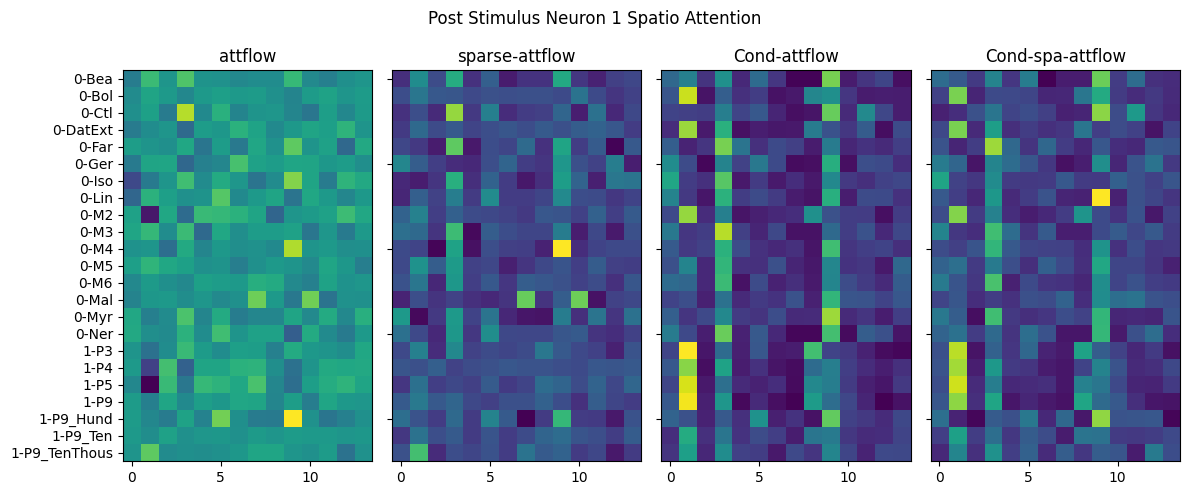

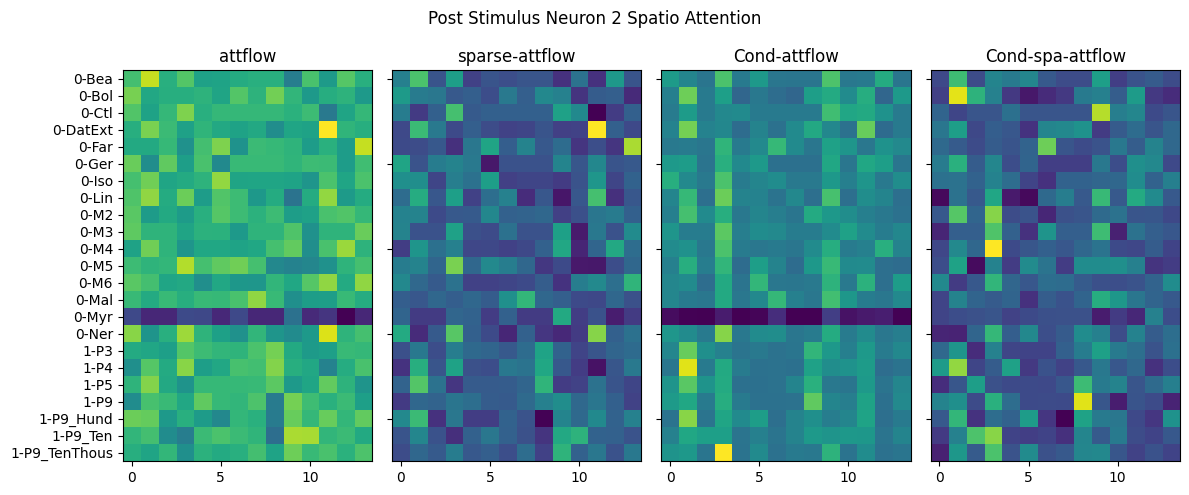

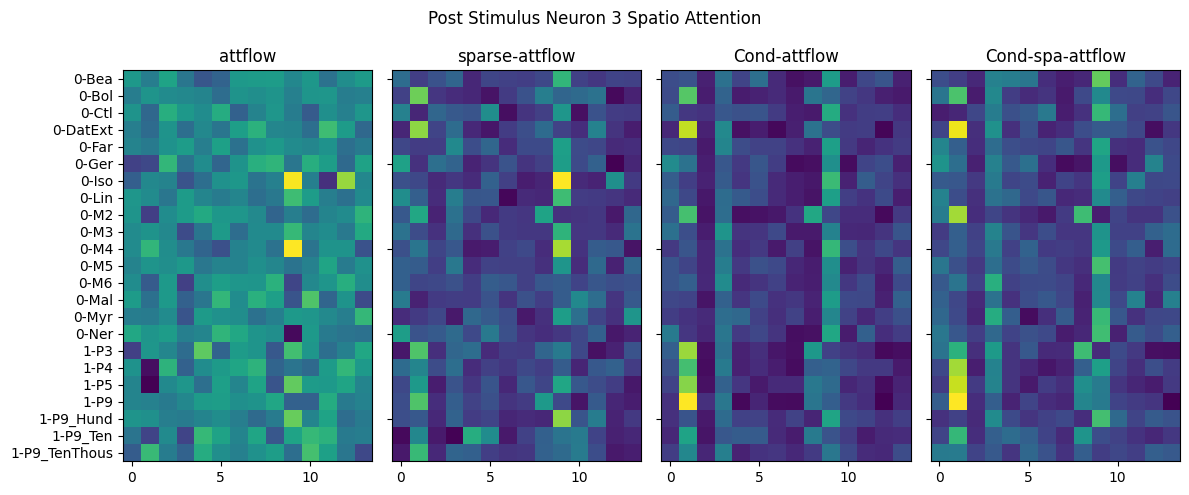

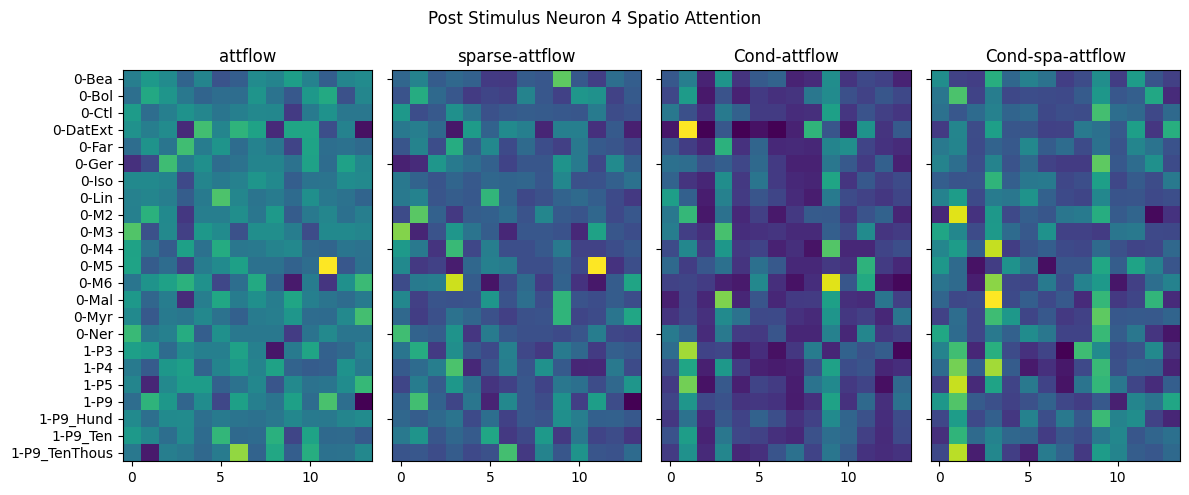

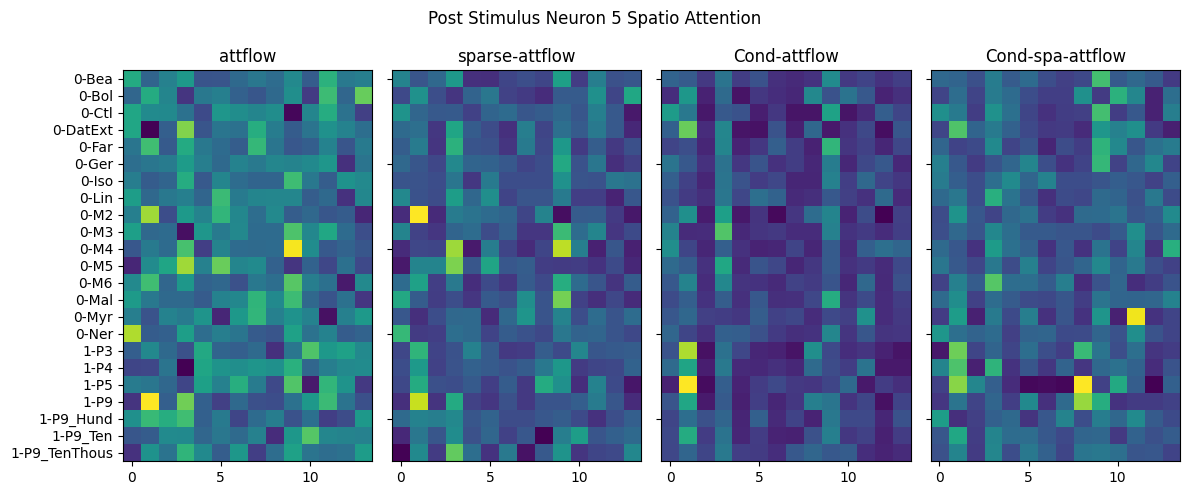

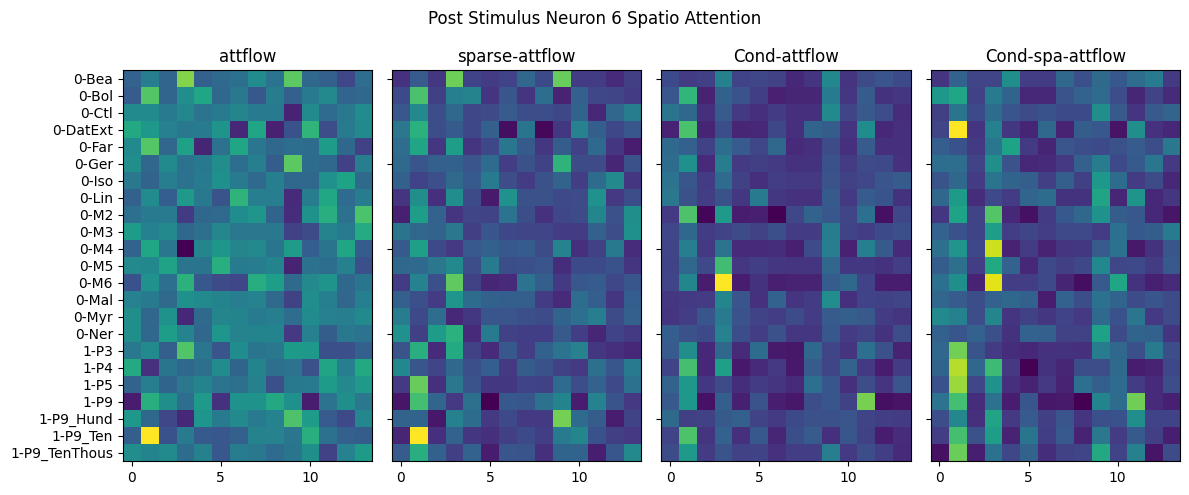

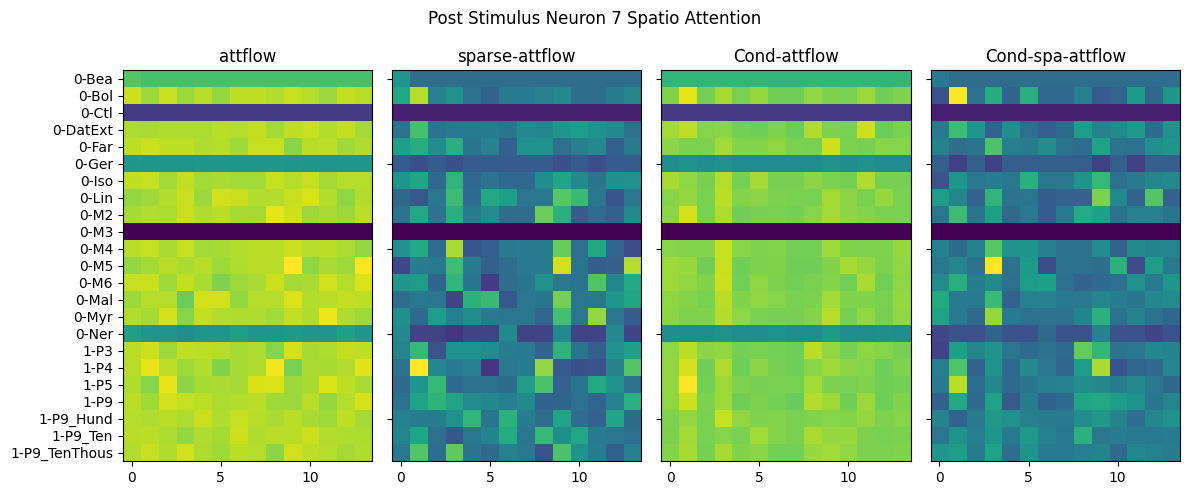

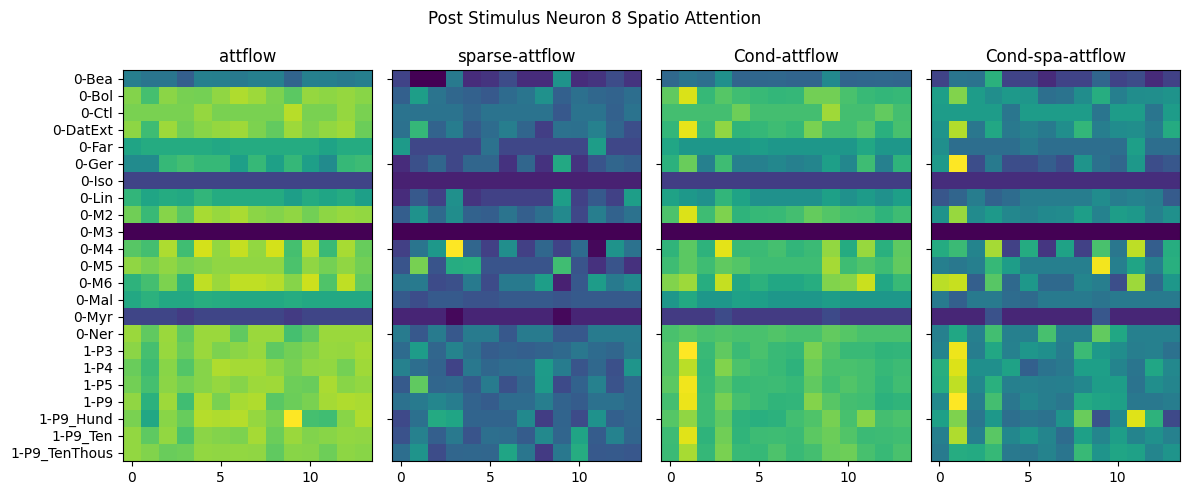

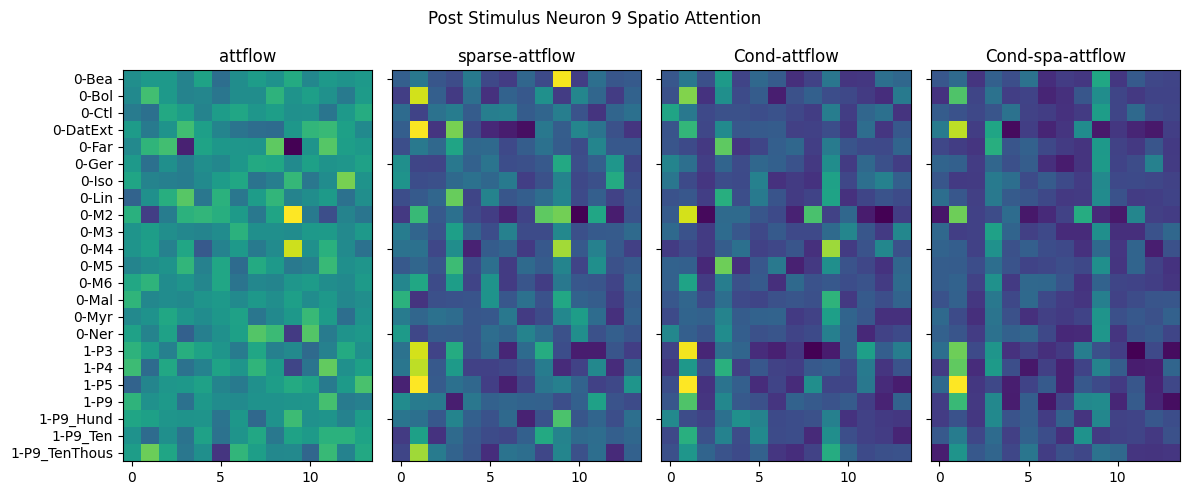

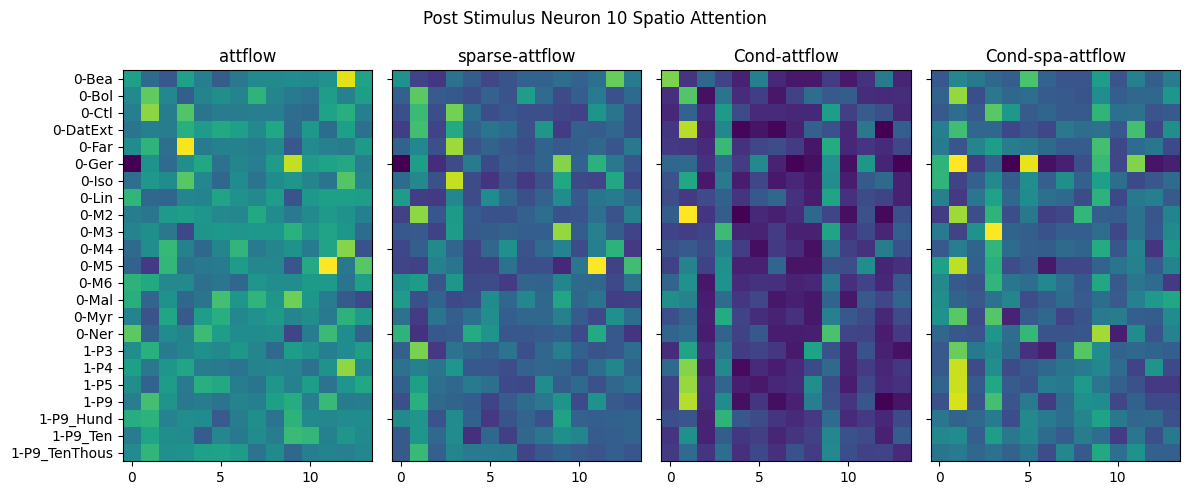

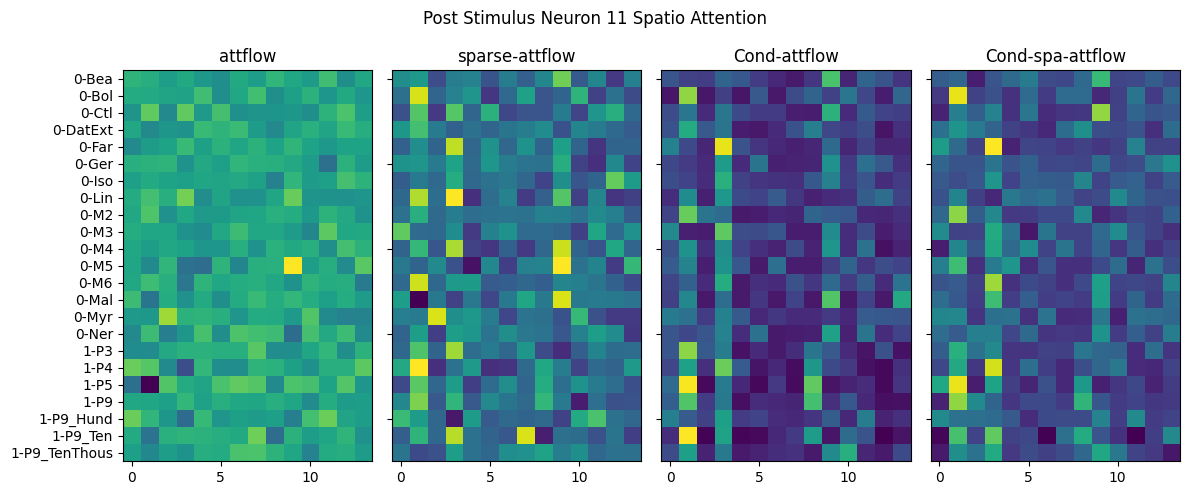

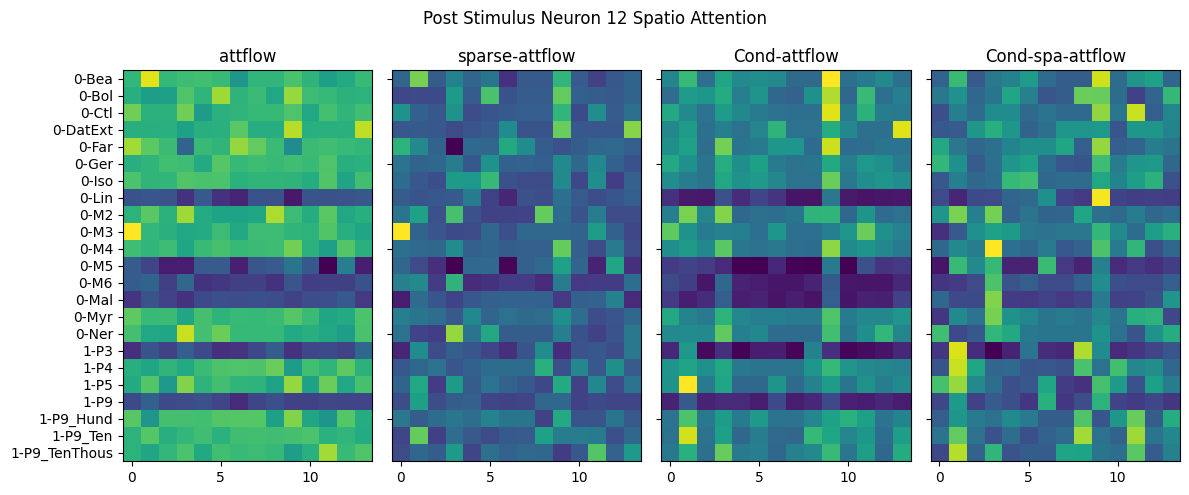

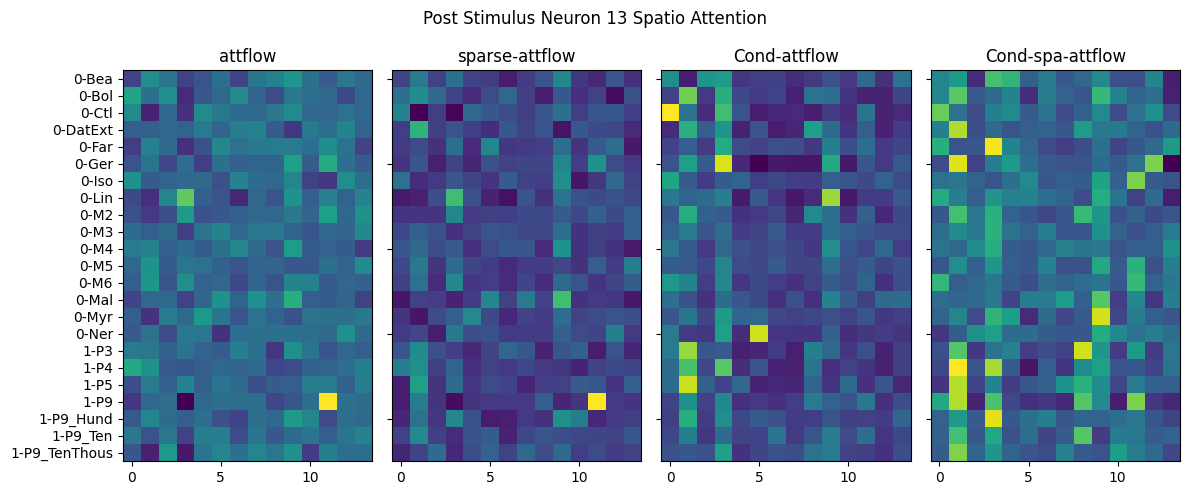

In [6]:
post_attcond_stim_ensemble_average = []
post_spa_attcond_stim_ensemble_average = []
for target in range(0,14):
    att_betai,_,_, att_ensemble = analyze_betai(yaml_filepath="config/attflow/attflow-{}.yaml".format(target), 
                                                                   cond=False)
    spa_att_betai,_,_, spa_att_ensemble = analyze_betai(yaml_filepath="config/sparse-attflow/sparse-attflow-{}.yaml".format(target), 
                                                                   cond=False)
    attcond_betai, _, _, attcond_ensemble = analyze_betai(yaml_filepath="config/attflow/attflow-{}.yaml".format(target),
                                                                               cond=True)
    spa_attcond_betai, _, _ ,spa_attcond_ensemble= analyze_betai(yaml_filepath="config/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    
    post_attcond_stim_ensemble_average.append(attcond_ensemble)
    post_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    plot_ensemble([att_ensemble, spa_att_ensemble,attcond_ensemble, spa_attcond_ensemble], 
                  ["attflow","sparse-attflow", "Cond-attflow","Cond-spa-attflow"], 
                  target,
                  q_labels=stimuli,
                  section="Post")

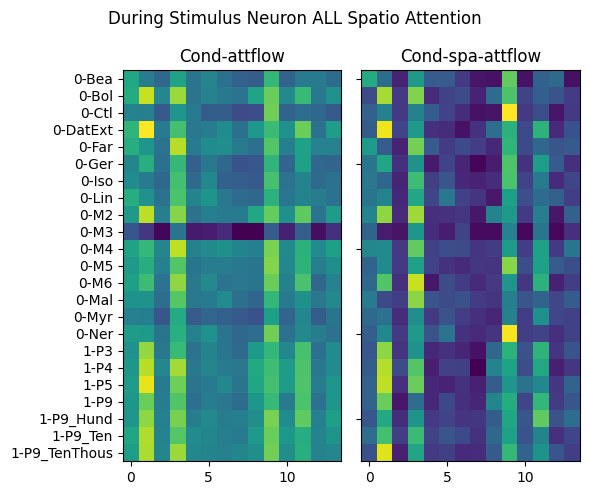

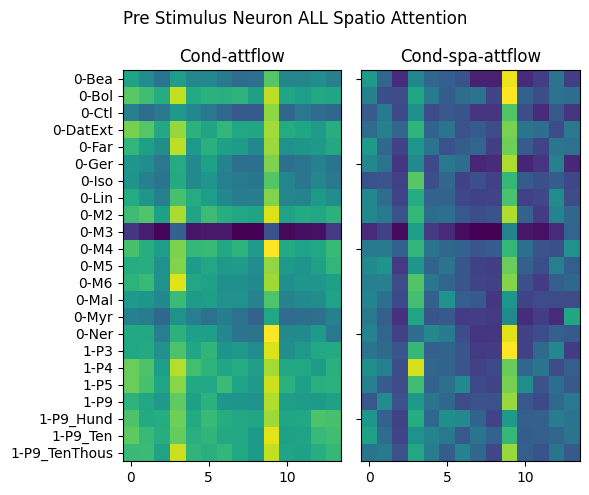

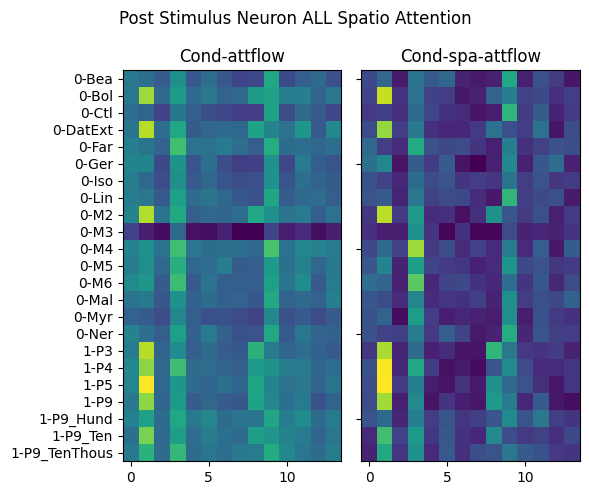

In [7]:
plot_ensemble([np.mean(dur_attcond_stim_ensemble_average,0), np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-attflow","Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              section="During")
plot_ensemble([np.mean(pre_attcond_stim_ensemble_average,0), np.mean(pre_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-attflow","Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              section="Pre")
plot_ensemble([np.mean(post_attcond_stim_ensemble_average,0), np.mean(post_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-attflow","Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              section="Post")

In [15]:
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)

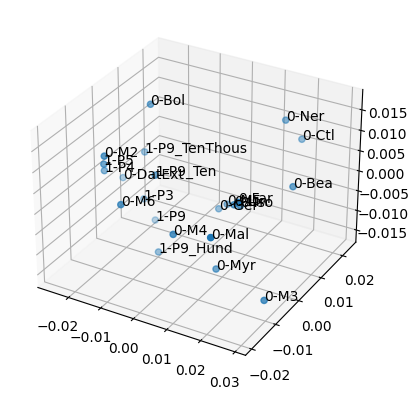

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [39]:
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
tsne = TSNE(n_components=2, perplexity=5)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))

In [32]:
np.array(dur_spa_attcond_stim_ensemble_average).shape

(14, 5, 23, 14)